In [1]:
import matplotlib.pylab as plt
import networkx as nx
import numpy as np

def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data

a=ldata("yeast_AP-MS.txt")
b=ldata("yeast_LIT.txt")
d=ldata("yeast_Y2H.txt")

# print("(a) Red Yeast Y2H")
# G = nx.Graph()
# G.add_edges_from(a)
# nx.draw(G, node_size=5)
# plt.show()

G = nx.Graph()
G.add_edges_from(a)

H = nx.Graph()
H.add_edges_from(b)

J = nx.Graph()
J.add_edges_from(d)

an=G.number_of_nodes()
bn=H.number_of_nodes()
dn=J.number_of_nodes()

print("numero de nodos de la red AP-MS    = "+str(an))
print("numero de nodos de la red Liter  = "+str(bn))
print("numero de nodos de la red Y2H    = "+str(an))

print("numero de enlaces de la red AP-MS    = "+str(G.number_of_edges()))
print("numero de enlaces de la red Liter  = "+str(H.number_of_edges()))
print("numero de enlaces de la red Y2H. = "+str(J.number_of_edges()))

grados = [gra for (nom,gra) in G.degree()] # [lo_que_quiero  for los_elementos in iterable]
grados_media_g=np.mean(np.asarray(grados))
print(' <k>AP-MS  = '+str(grados_media_g))

grados = [gra for (nom,gra) in H.degree()] # [lo_que_quiero  for los_elementos in iterable]
grados_media_h=np.mean(np.asarray(grados))
print(' <k>Liter = '+str(grados_media_h))

grados = [gra for (nom,gra) in J.degree()] # [lo_que_quiero  for los_elementos in iterable]
grados_media_j=np.mean(np.asarray(grados))
print(' <k>Y2H  = '+str(grados_media_j))

av=nx.average_clustering(G)
tr=nx.transitivity(G)
print('<C_av_local>AP-MS  = '+str(av))
print('<C_global>AP-MS = '+str(tr))

av=nx.average_clustering(H)
tr=nx.transitivity(H)
print('<C_av_local>Liter  = '+str(av))
print('<C_global>Liter = '+str(tr))

av=nx.average_clustering(J)
tr=nx.transitivity(J)
print('<C_av_local>Y2H = '+str(av))
print('<C_global>Y2H = '+str(tr))

numero de nodos de la red AP-MS    = 1622
numero de nodos de la red Liter  = 1536
numero de nodos de la red Y2H    = 1622
numero de enlaces de la red AP-MS    = 9070
numero de enlaces de la red Liter  = 2925
numero de enlaces de la red Y2H. = 2930
 <k>AP-MS  = 11.183723797780518
 <k>Liter = 3.80859375
 <k>Y2H  = 2.9038652130822595
<C_av_local>AP-MS  = 0.5546360657013013
<C_global>AP-MS = 0.6185901626483971
<C_av_local>Liter  = 0.2924923005815711
<C_global>Liter = 0.3461926495315878
<C_av_local>Y2H = 0.046194001297365166
<C_global>Y2H = 0.02361415364051535


In [2]:

cont = 0
for i in G.edges:
    if i in H.edges:
        cont=cont+1
print(cont/G.number_of_edges())  

cont = 0
for i in H.edges:
    if i in G.edges:
        cont=cont+1
print(cont/H.number_of_edges()) 

cont = 0
for i in G.edges:
    if i in J.edges:
        cont=cont+1
print(cont/G.number_of_edges()) 

cont = 0
for i in J.edges:
    if i in G.edges:
        cont=cont+1
print(cont/J.number_of_edges()) 

cont = 0
for i in J.edges:
    if i in H.edges:
        cont=cont+1
print(cont/J.number_of_edges()) 

cont = 0
for i in H.edges:
    if i in J.edges:
        cont=cont+1  
print(cont/H.number_of_edges()) 


0.14310915104740904
0.4437606837606838
0.02866593164277839
0.08873720136518772
0.08873720136518772
0.08888888888888889


In [3]:
es=ldata("esenciales.txt")

for i in G.nodes:
    G.nodes[i]["es"] = 0

for n in es:
    if n[0] in G.nodes:
        G.nodes[n[0]]["es"] = 1

for i in J.nodes:
    J.nodes[i]["es"] = 0

for n in es:
    if n[0] in J.nodes:
        J.nodes[n[0]]["es"] = 1
        
for i in H.nodes:
    H.nodes[i]["es"] = 0

for n in es:
    if n[0] in H.nodes:
        H.nodes[n[0]]["es"] = 1

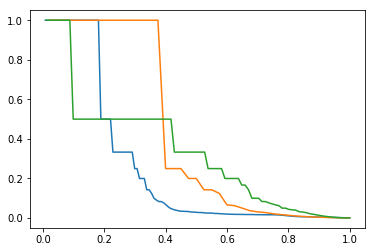

In [4]:
grados = [gra for (nom,gra) in G.degree()] # [lo_que_quiero  for los_elementos in iterable]
nombre = [nom for (nom,gra) in G.degree()] # [lo_que_quiero  for los_elementos in iterable]
Datos = np.asarray(grados)

frac=[]
x=[]

for i in range(max(Datos)):
    ese=0
    noese=0
    for j in range(len(Datos)):
        if Datos[j]>=i:
            if G.nodes[nombre[j]]['es']==1:
                ese=+1
            else:
                noese=noese+1
    frac.append(ese/float(ese+noese))
    xi=1-1/max(Datos)*i
    x.append(xi)
Gx=x.copy()
Gfrac=frac.copy()

grados = [gra for (nom,gra) in H.degree()] # [lo_que_quiero  for los_elementos in iterable]
nombre = [nom for (nom,gra) in H.degree()] # [lo_que_quiero  for los_elementos in iterable]
Datos = np.asarray(grados)

frac=[]
x=[]

for i in range(max(Datos)):
    ese=0
    noese=0
    for j in range(len(Datos)):
        if Datos[j]>=i:
            if H.nodes[nombre[j]]['es']==1:
                ese=+1
            else:
                noese=noese+1
    frac.append(ese/float(ese+noese))
    xi=1-1/max(Datos)*i
    x.append(xi)
Hx=x.copy()
Hfrac=frac.copy()

grados = [gra for (nom,gra) in J.degree()] # [lo_que_quiero  for los_elementos in iterable]
nombre = [nom for (nom,gra) in J.degree()] # [lo_que_quiero  for los_elementos in iterable]
Datos = np.asarray(grados)

frac=[]
x=[]

for i in range(max(Datos)):
    ese=0
    noese=0
    for j in range(len(Datos)):
        if Datos[j]>=i:
            if J.nodes[nombre[j]]['es']==1:
                ese=+1
            else:
                noese=noese+1
    frac.append(ese/float(ese+noese))
    xi=1-1/max(Datos)*i
    x.append(xi)
Jx=x.copy()
Jfrac=frac.copy() 

plt.plot(Gx,Gfrac)
plt.plot(Hx,Hfrac)
plt.plot(Jx,Jfrac)
plt.show()


# Sacando al azar

In [42]:
import random
def sacar_random(RED):
    GG=RED.copy() #Copio la red
    Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0] #Conjunto de nodos comp_gigante
    Componente_Gigante = GG.subgraph(Componente_Gigante_INT) #armo la RED con sólo la componente gigante
    cantidad_nodos_gigante = len(Componente_Gigante)

    paso=0
    dg=[]
    pasos=[]
    while len(Componente_Gigante)>1:
        paso+=1
        listanodos = [nom for (nom,gra) in Componente_Gigante.degree()]
        GG.remove_node(random.choice(listanodos))
        Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0]
        Componente_Gigante = GG.subgraph(Componente_Gigante_INT)
        fraccion=len(Componente_Gigante)/cantidad_nodos_gigante
        dg.append(fraccion)
        pasos.append(paso/cantidad_nodos_gigante)
        GG=Componente_Gigante.copy()
    return(pasos,dg)

# Sacando el de mayor grado

In [43]:
def sacar_grado(RED):
    GG=RED.copy() #Copio la red
    Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0] #Conjunto de nodos comp_gigante
    Componente_Gigante = GG.subgraph(Componente_Gigante_INT) #armo la RED con sólo la componente gigante
    cantidad_nodos_gigante = len(Componente_Gigante)

    paso=0
    dg=[]
    pasos=[]
    while len(Componente_Gigante)>1:
        paso+=1
        grados_GG = [gra for (nom,gra) in GG.degree()]
        Grados = np.asarray(grados_GG)
        I=GG.copy() #copio la red para que el iterable no cambie al remover un nodo
        for i in I.nodes(): #remuevo el nodo de mayor grado
            if GG.degree[i]==np.max(Grados):
                GG.remove_node(i)
        Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0] #Redefino la componente gigante sin el nodo que saqué
        Componente_Gigante = GG.subgraph(Componente_Gigante_INT)
        GG=Componente_Gigante.copy()
        fraccion=len(Componente_Gigante)/cantidad_nodos_gigante #proporción de nodos que restan
        dg.append(fraccion)
        pasos.append(paso/cantidad_nodos_gigante) #proporción de nodos que saqué del total de la comp gigante original
    return(pasos,dg)

# Sacando el de mayor betweenes

In [44]:
def sacar_between(RED):
    GG=RED.copy()
    Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0]
    Componente_Gigante = GG.subgraph(Componente_Gigante_INT)
    cantidad_nodos_gigante = len(Componente_Gigante)
    bet=nx.betweenness_centrality(Componente_Gigante, k=None, normalized=True, weight=None, endpoints=False, seed=None)

    paso=0
    dg=[]
    pasos=[]

    nom_GG = [nom for (nom,betw) in bet.items()]
    betw_GG = [betw for (nom,betw) in bet.items()]
    betw = np.asarray(betw_GG)

    while len(Componente_Gigante)>1:
        if nom_GG[np.argmax(betw)] in GG.nodes():
            GG.remove_node(nom_GG[np.argmax(betw)])
            #betw = betw[betw!=np.max(betw)]
            del(betw_GG[np.argmax(betw)])
            del(nom_GG[np.argmax(betw)])
            betw = np.asarray(betw_GG)
            Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0]
            Componente_Gigante = GG.subgraph(Componente_Gigante_INT)
            paso+=1
            GG=Componente_Gigante.copy()
        else:
            del(betw_GG[np.argmax(betw)])
            del(nom_GG[np.argmax(betw)])
            betw = np.asarray(betw_GG)
        fraccion=len(Componente_Gigante)/cantidad_nodos_gigante
        dg.append(fraccion)
        pasos.append(paso/cantidad_nodos_gigante)
    return(pasos,dg)

# Sacando el de mayor Eigenvector

In [45]:
def sacar_eigen(RED):
    GG=RED.copy()
    Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0]
    Componente_Gigante = GG.subgraph(Componente_Gigante_INT)
    cantidad_nodos_gigante = len(Componente_Gigante)
    GG=Componente_Gigante.copy()
    bet=nx.eigenvector_centrality(Componente_Gigante, max_iter=100, tol=1e-06, nstart=None, weight='weight')

    paso=0
    dg=[]
    pasos=[]

    nom_GG = [nom for (nom,betw) in bet.items()]
    betw_GG = [betw for (nom,betw) in bet.items()]
    betw = np.asarray(betw_GG)

    while len(Componente_Gigante)>1:
        if nom_GG[np.argmax(betw)] in GG.nodes():
            GG.remove_node(nom_GG[np.argmax(betw)])
            del(betw_GG[np.argmax(betw)])
            del(nom_GG[np.argmax(betw)])
            betw = np.asarray(betw_GG)
            Componente_Gigante_INT=sorted(nx.connected_components(GG), key=len, reverse=True)[0]
            Componente_Gigante = GG.subgraph(Componente_Gigante_INT)
            paso+=1
            GG=Componente_Gigante.copy()
        else:
            del(betw_GG[np.argmax(betw)])
            del(nom_GG[np.argmax(betw)])
            betw = np.asarray(betw_GG)  
        fraccion=len(Componente_Gigante)/cantidad_nodos_gigante
        dg.append(fraccion)
        pasos.append(paso/cantidad_nodos_gigante)
    return(pasos,dg)

# Calculo las funciones a todas las redes

In [56]:
RED=G
pasos_random_G,nodos_random_G=sacar_random(RED)
pasos_grado_G,nodos_grado_G=sacar_grado(RED)
pasos_between_G,nodos_between_G=sacar_between(RED)
pasos_eigen_G,nodos_eigen_G=sacar_eigen(RED)

In [57]:
RED=H
pasos_random_H,nodos_random_H=sacar_random(RED)
pasos_grado_H,nodos_grado_H=sacar_grado(RED)
pasos_between_H,nodos_between_H=sacar_between(RED)
pasos_eigen_H,nodos_eigen_H=sacar_eigen(RED)

In [58]:
RED=J
pasos_random_J,nodos_random_J=sacar_random(RED)
pasos_grado_J,nodos_grado_J=sacar_grado(RED)
pasos_between_J,nodos_between_J=sacar_between(RED)
pasos_eigen_J,nodos_eigen_J=sacar_eigen(RED)

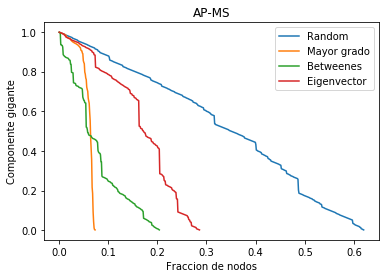

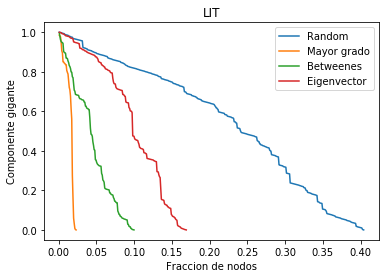

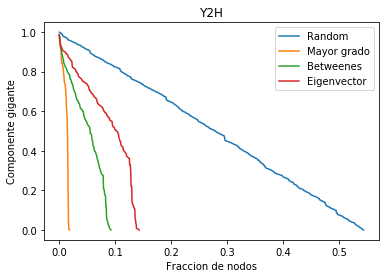

In [60]:
plt.figure()
plt.plot(pasos_random_G,nodos_random_G,label="Random")
plt.plot(pasos_grado_G,nodos_grado_G,label="Mayor grado")
plt.plot(pasos_between_G,nodos_between_G,label="Betweenes")
plt.plot(pasos_eigen_G,nodos_eigen_G,label="Eigenvector")
plt.legend()
plt.title("AP-MS")
plt.xlabel('Fraccion de nodos')
plt.ylabel('Componente gigante')
plt.figure()
plt.plot(pasos_random_H,nodos_random_H,label="Random")
plt.plot(pasos_grado_H,nodos_grado_H,label="Mayor grado")
plt.plot(pasos_between_H,nodos_between_H,label="Betweenes")
plt.plot(pasos_eigen_H,nodos_eigen_H,label="Eigenvector")
plt.legend()
plt.title("LIT")
plt.xlabel('Fraccion de nodos')
plt.ylabel('Componente gigante')
plt.figure()
plt.plot(pasos_random_J,nodos_random_J,label="Random")
plt.plot(pasos_grado_J,nodos_grado_J,label="Mayor grado")
plt.plot(pasos_between_J,nodos_between_J,label="Betweenes")
plt.plot(pasos_eigen_J,nodos_eigen_J,label="Eigenvector")
plt.legend()
plt.title("Y2H")
plt.xlabel('Fraccion de nodos')
plt.ylabel('Componente gigante')
plt.show()

Tabla 3 Zotenko

In [81]:
grados = [gra for (nom,gra) in G.degree()] # [lo_que_quiero  for los_elementos in iterable]
nombre = [nom for (nom,gra) in G.degree()] # [lo_que_quiero  for los_elementos in iterable]
Datos = np.asarray(grados)

frac=[]
esential=[]
x=[]

for i in range(max(Datos)):
    ese=0
    noese=0
    for j in range(len(Datos)):
        if Datos[j]>=i:
            if G.nodes[nombre[j]]['es']==1:
                ese=+1
                esential.append(G.degree())
            else:
                noese=noese+1
    frac.append(ese/float(ese+noese))
    xi=1-1/max(Datos)*i
    x.append(xi)
Gx=x.copy()
Gfrac=frac.copy()
print(esential)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [80]:
for i in G.nodes():
    if G.nodes[i]['es']==1:
        

DegreeView({'YCR024C': 2, 'YBL004W': 44, 'YNR051C': 1, 'YJR011C': 1, 'YHR110W': 1, 'YNL177C': 3, 'YNR003C': 16, 'YOR124C': 2, 'YPR180W': 1, 'YJR043C': 2, 'YDL116W': 5, 'YPL153C': 1, 'YHR119W': 6, 'YDL201W': 1, 'YER086W': 4, 'YOR075W': 6, 'YNL099C': 4, 'YGR071C': 1, 'YNL261W': 5, 'YOL068C': 1, 'YDR394W': 27, 'YLR418C': 9, 'YOL063C': 1, 'YOR290C': 10, 'YDR050C': 2, 'YLR423C': 3, 'YLR106C': 17, 'YDR301W': 14, 'YPL046C': 1, 'YMR273C': 5, 'YOR185C': 2, 'YLR186W': 39, 'YML035C': 1, 'YKR008W': 16, 'YOR304W': 11, 'YFL018C': 5, 'YJR045C': 2, 'YLR345W': 1, 'YDR188W': 7, 'YER136W': 2, 'YLL045C': 98, 'YHR012W': 4, 'YGL245W': 5, 'YDR432W': 4, 'YDL013W': 5, 'YEL058W': 1, 'YJL047C': 3, 'YLR440C': 6, 'YER117W': 2, 'YOR069W': 4, 'YKL154W': 1, 'YIL097W': 5, 'YKL181W': 1, 'YPR187W': 35, 'YOR212W': 1, 'YOL021C': 14, 'YPL010W': 6, 'YNR010W': 24, 'YJL183W': 6, 'YPR181C': 5, 'YLR410W': 1, 'YJL061W': 3, 'YER089C': 1, 'YJL011C': 14, 'YPL190C': 10, 'YGR285C': 4, 'YDL136W': 62, 'YCR066W': 1, 'YAR002W': 3, 'YDL15

In [82]:
G.nodes()

NodeView(('YCR024C', 'YBL004W', 'YML124C', 'YJR011C', 'YHR110W', 'YNL177C', 'YBR251W', 'YNR003C', 'YOR124C', 'YGL252C', 'YJR043C', 'YDL116W', 'YHR119W', 'YDL201W', 'YER086W', 'YOR075W', 'YJL164C', 'YNL099C', 'YGR071C', 'YNL261W', 'YOL068C', 'YNL096C', 'YOL070C', 'YER120W', 'YLR418C', 'YOL063C', 'YJL080C', 'YDR050C', 'YLR423C', 'YLR106C', 'YDR301W', 'YGR084C', 'YPL046C', 'YMR273C', 'YOR185C', 'YLR186W', 'YML035C', 'YKR008W', 'YCR014C', 'YFL018C', 'YJR045C', 'YKR038C', 'YDR188W', 'YER136W', 'YLL045C', 'YHR012W', 'YGL245W', 'YDR429C', 'YDR432W', 'YDL013W', 'YEL058W', 'YJL047C', 'YLR384C', 'YER117W', 'YOR069W', 'YKL154W', 'YHR085W', 'YIL097W', 'YKL181W', 'YPR187W', 'YOR212W', 'YOL021C', 'YPL010W', 'YNR010W', 'YNL172W', 'YPR181C', 'YLR410W', 'YJL061W', 'YER089C', 'YJL011C', 'YPL190C', 'YGR285C', 'YDL136W', 'YCR066W', 'YHR118C', 'YJL026W', 'YDL156W', 'YDR362C', 'YKL190W', 'YKL045W', 'YMR303C', 'YJL146W', 'YPR179C', 'YPR055W', 'YHR058C', 'YLR362W', 'YAL053W', 'YMR112C', 'YCR076C', 'YPR175W', 